In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../sample_data/suppressed_20180101_20190103.csv')

In [44]:
df

,date,time,profit_gap,buy_volume,sell_volume,amount,code
0,20171226,902,-0.369458,33533,28125,4996888000,A215600
1,20171226,903,0.247219,30912,16900,3870305000,A215600
2,20171226,904,0.493218,34471,15529,4062541000,A215600
3,20171226,905,0.490798,60524,26138,7090767000,A215600
4,20171226,906,-0.976801,39718,44760,6903013000,A215600
...,...,...,...,...,...,...,...
18885358,20190102,1458,0.467836,1014,0,8576000,A234920
18885359,20190102,1500,-0.700935,280,850,9629000,A234920
18885360,20190102,1505,-0.235294,16,3514,29134000,A234920
18885361,20190102,1509,0.117786,1650,74,12878000,A234920


In [46]:
X = df[df['code'] == 'A215600']

In [47]:
X = X[['time', 'buy_volume', 'sell_volume', 'profit_gap']]

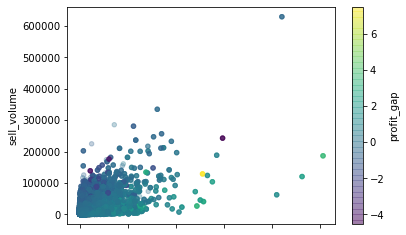

In [49]:
filtered = X
filtered.plot.scatter(x='buy_volume', y='sell_volume', c='profit_gap', colormap='viridis', alpha=0.3)

In [56]:
import numpy as np
X = X[np.abs(X.buy_volume-X.buy_volume.mean()) <= (3*X.buy_volume.std())]
X = X[np.abs(X.sell_volume-X.sell_volume.mean()) <= (3*X.sell_volume.std())]
Y = X['profit_gap']

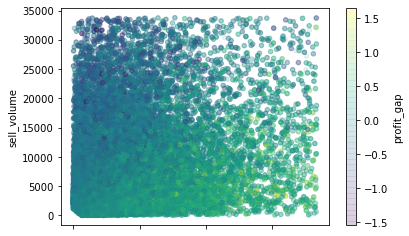

In [57]:
filtered = X
filtered.plot.scatter(x='buy_volume', y='sell_volume', c='profit_gap', colormap='viridis', alpha=0.1)

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['buy_volume', 'sell_volume']], Y, test_size = 0.2)

linear = LinearRegression()
linear.fit(X = X_train, y = y_train)

pred = linear.predict(X = X_test)

#print('intercept = ', linear.intercept_)

#print('coef = ', linear.coef_)
#np.random.seed(1)

#y_pred = svm.predict(X_xor_new)

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(pred, y_test)
print('MSE = ', MSE)

print('RMSE = ', MSE**0.5)
print(linear.score(X_test, y_test))

MSE =  0.04639996496592306
RMSE =  0.21540651096455524
0.45118998742765337


In [74]:
Y.describe()

count    132631.000000
mean         -0.004721
std           0.290267
min          -1.544944
25%          -0.171086
50%           0.000000
75%           0.152439
max           1.648352
Name: profit_gap, dtype: float64

In [60]:
Y.describe()

count    132631.000000
mean         -0.004721
std           0.290267
min          -1.544944
25%          -0.171086
50%           0.000000
75%           0.152439
max           1.648352
Name: profit_gap, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

# use moons dataset
X, y = make_moons( n_samples=500, noise=0.30, random_state=42)

X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=42)

In [41]:
X_train

array([[ 1.53869929e+00,  1.88744130e-01],
       [ 3.94698536e-01,  3.23723608e-01],
       [-9.19146564e-01,  1.31188165e+00],
       [ 1.05396355e+00, -7.00407873e-01],
       [ 1.04067847e+00, -4.37338701e-01],
       [ 1.00933981e-01, -3.03530559e-01],
       [ 1.18128413e+00,  7.61136745e-02],
       [-1.21046915e-01, -9.08388899e-02],
       [-8.87106610e-01,  5.12633178e-01],
       [ 9.37451497e-01,  2.34296809e-01],
       [ 7.11654204e-01,  1.54701440e-01],
       [ 1.25893422e+00, -3.54797752e-01],
       [ 3.86380017e-01,  4.15946340e-01],
       [ 9.44441260e-01,  5.17911799e-01],
       [-7.40742091e-01,  5.36229504e-01],
       [ 2.05623856e+00, -2.39382466e-02],
       [ 1.85814503e+00,  3.09624394e-01],
       [-5.61395675e-01,  6.35114044e-01],
       [ 1.19704521e+00,  1.05274369e-01],
       [-8.14968012e-01,  2.64231623e-01],
       [ 2.15881305e+00,  1.49840044e-01],
       [ 1.11201360e+00, -2.15523587e-01],
       [ 1.30882068e+00,  7.26225254e-01],
       [-7.